In [68]:
from sklearn.datasets import load_iris
data = load_iris()
type(data), dir(data)   # dir 찍으면 속성과 함수 보여줌

(sklearn.utils._bunch.Bunch,
 ['DESCR',
  'data',
  'data_module',
  'feature_names',
  'filename',
  'frame',
  'target',
  'target_names'])

In [4]:
type(data.data), data.data.shape

(numpy.ndarray, (150, 4))

In [5]:
type(data.target), data.target.shape

(numpy.ndarray, (150,))

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
from sklearn.model_selection import cross_val_score
import numpy as np
np.mean(cross_val_score(lr, data.data, data.target, cv=10))

np.float64(0.9733333333333334)

In [35]:
from sklearn.model_selection import cross_validate
cross_validate(lr, data.data, data.target, return_train_score=True)

{'fit_time': array([0.02694607, 0.03852677, 0.01641822, 0.        , 0.00102663]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [44]:
from sklearn.model_selection import KFold
k = KFold(shuffle=True)
cross_val_score(lr, data.data, data.target, cv=k)

array([0.96666667, 0.96666667, 0.96666667, 0.9       , 0.96666667])

In [58]:
from sklearn.model_selection import StratifiedKFold
sk = StratifiedKFold(shuffle=True, n_splits=10)
cross_val_score(lr, data.data, data.target, cv=sk)

array([0.93333333, 0.93333333, 1.        , 0.93333333, 1.        ,
       1.        , 0.93333333, 1.        , 0.93333333, 1.        ])

In [59]:
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [65]:
def add(a, b, *args, **kargs):
    print('args', args)
    print('kargs', kargs)
    return a + b

data = [1, 2]
params = {'a': 1, 'b': 2, 'c':3}
add(**params)

args ()
kargs {'c': 3}


3

In [83]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()

params = {
    'C': [0.001, 0.01, 0.1, 1.0],
    'gamma': [0.001, 0.01, 0.1, 1.0]
}
sf = StratifiedKFold(shuffle=True, n_splits=10)
gs = GridSearchCV(svc, params, cv=sf)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [91]:
models = gs.fit(X_train, y_train)

In [92]:
models.best_estimator_

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,1.0
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [94]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
type(data), dir(data)

(sklearn.utils._bunch.Bunch,
 ['DESCR',
  'data',
  'data_module',
  'feature_names',
  'filename',
  'frame',
  'target',
  'target_names'])

In [95]:
data.data.shape, data.target.shape

((569, 30), (569,))

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

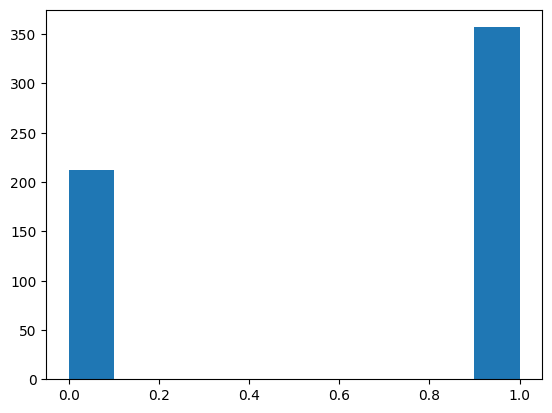

In [96]:
import matplotlib.pyplot as plt
plt.hist(data.target)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

svc = SVC()

In [98]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [99]:
y_pred = svc.predict(X_test)
y_pred.shape

(143,)

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_pred)

array([[43,  5],
       [ 7, 88]])

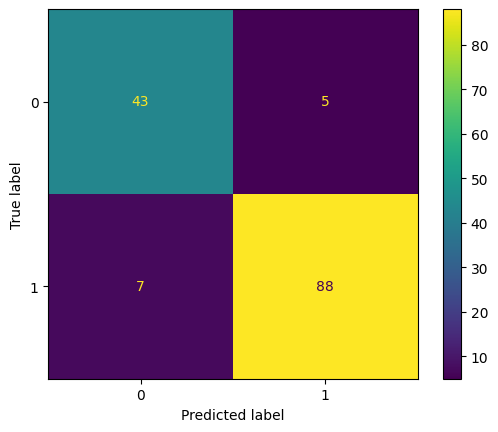

In [103]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()